In [320]:
from PIL import Image, ImageDraw
import scrolls.colors as colors

In [313]:
def measuring_rectangle(image, xyxy, color=colors.RED, thickness=2):
    img = image.copy()
    x1, y1, x2, y2 = xyxy

    draw = ImageDraw.Draw(img)

    left_side = [(x1, y2), (x1, y1)]
    top_side = [(x1, y1), (x2, y1)]
    right_side = [(x2, y1), (x2, y2)]
    bottom_side = [(x2, y2), (x1, y2)]

    width = x2 - x1
    height = y2 - y1

    cx, cy = (x1 + x2) / 2, (y1 + y2) / 2

    draw.line(left_side, fill=color, width=thickness)
    #draw.text((x1 + 5, cy), f'height={height}', fill=color, anchor='la')

    draw.line(top_side, fill=color, width=thickness)
    draw.text((cx, y1 - 5), f'width={width}', fill=color, anchor='mb')

    draw.line(right_side, fill=color, width=thickness)
    draw.text((x2 - 5, cy), f'height={height}', fill=color, anchor='ra')

    draw.line(bottom_side, fill=color, width=thickness)
    #draw.text((cx, y2 + 5), f'width={width}', fill=color, anchor='mt')

    draw.ellipse((cx - 2, cy - 2, cx + 2, cy + 2), fill=color)
    draw.text((cx, cy + 5), f'{cx, cy}', fill=color, anchor='mt')

    draw.ellipse((x1 - 2, y1 - 2, x1 + 2, y1 + 2), fill=color)
    draw.text((x1, y1 - 5), f'{x1, y1}', fill=color, anchor='mb')

    draw.ellipse((x2 - 2, y2 - 2, x2 + 2, y2 + 2), fill=color)
    draw.text((x2, y2 + 5), f'{x2, y2}', fill=color, anchor='mt')

    draw.ellipse((x1 - 2, y2 - 2, x1 + 2, y2 + 2), fill=color)
    draw.text((x1, y2 + 5), f'{x1, y2}', fill=color, anchor='mt')

    draw.ellipse((x2 - 2, y1 - 2, x2 + 2, y1 + 2), fill=color)
    draw.text((x2, y1 - 5), f'{x2, y1}', fill=color, anchor='mb')

    wx, wy = (x1 + cx) // 2, cy
    half_w = (cx - x1)
    draw.line([(x1, cy), (cx, cy)], fill=color, width=thickness)
    draw.ellipse([(wx - 2, wy - 2), (wx + 2, wy + 2)], fill=color)
    draw.text((wx, wy - 5), f'w/2={half_w}', fill=color, anchor='mb')


    hx, hy = cx, (y1 + cy) // 2
    half_h = (cy - y1)
    draw.line([(cx, y1), (cx, cy)], fill=color, width=thickness)
    draw.ellipse([(hx - 2, hy - 2), (hx + 2, hy + 2)], fill=color)
    draw.text((hx + 5, hy), f'h/2={half_h}', fill=color, anchor='lm')

    return img

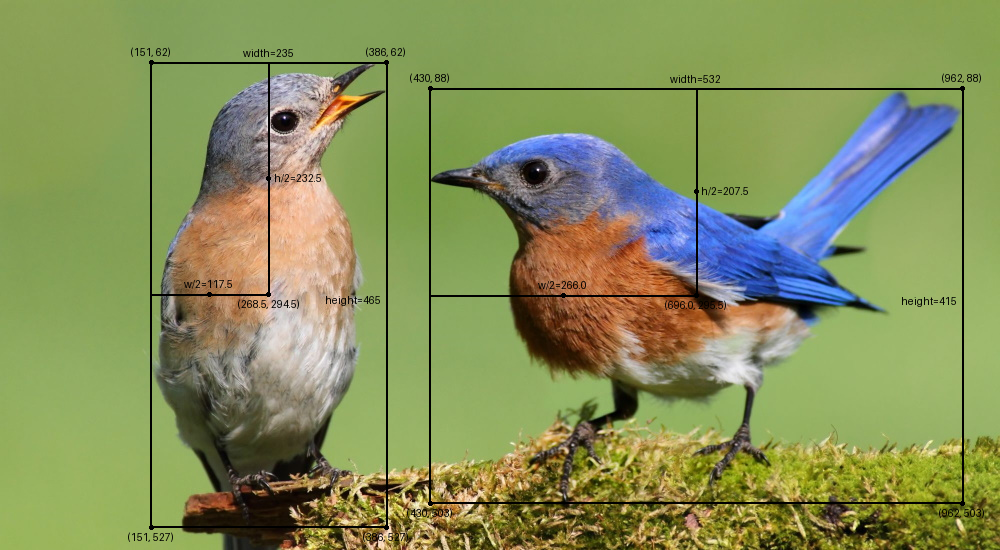

In [323]:
left_xyxy = (151, 62, 386, 527)
right_xyxy = (430, 88, 962, 503)

image = Image.open('images\eastern_blue_bird_pair.jpg')
image = measuring_rectangle(image, left_xyxy, color=colors.BLACK)
image = measuring_rectangle(image, right_xyxy, color=colors.BLACK)
image

In [329]:
left_xywh = (151, 62, 235, 465)
left_cxywh = (268.5, 294.5, 117.5, 232.5)

right_xywh = (430, 88, 532, 415)
right_cxywh = (696, 295.5, 266, 207.5)